In [ ]:
#EX NO:1
#Developing a Neural Network Regression Model
#REG NO:212222230093

In [48]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
X = torch.linspace(1,70,70).reshape(-1,1)

In [50]:
torch.manual_seed(71)
e = torch.randint(-8,9,(70,1),dtype=torch.float)


In [51]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([70, 1])


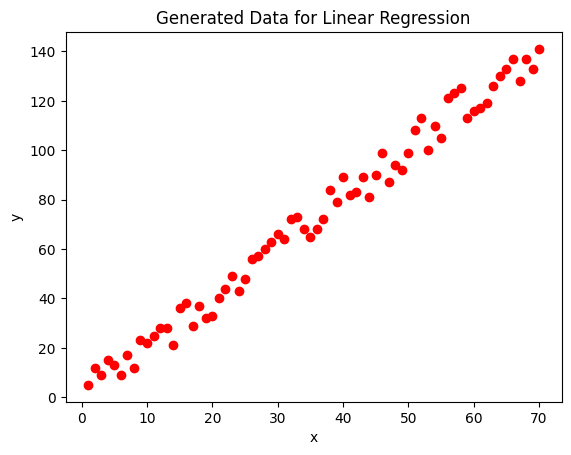

In [52]:
plt.scatter(X.numpy(), y.numpy(),color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [53]:
torch.manual_seed(59)

In [54]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):                # <-- REQUIRED
        y_pred = self.linear(x)
        return y_pred


In [55]:
torch.manual_seed(59)
model = Model(1, 1)


In [56]:
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [57]:
loss_function = nn.MSELoss()

In [58]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
epochs = 50
losses = []

In [59]:
for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()


In [60]:
print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')

epoch: 50  loss: 23.71673203  weight: 1.99034309  bias: 1.00654805


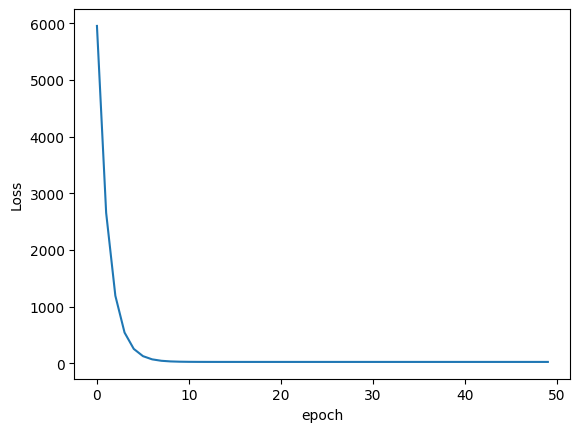

In [61]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()

In [62]:
x1 = torch.tensor([X.min().item(), X.max().item()])
w1, b1 = model.linear.weight.item(), model.linear.bias.item()
y1 = x1 * w1 + b1

In [63]:
print(f'Final Weight: {w1:.8f}, Final Bias: {b1:.8f}')
print(f'X range: {x1.numpy()}')
print(f'Predicted Y values: {y1.numpy()}')


Final Weight: 1.99034309, Final Bias: 1.00654805
X range: [ 1. 70.]
Predicted Y values: [  2.996891 140.33057 ]


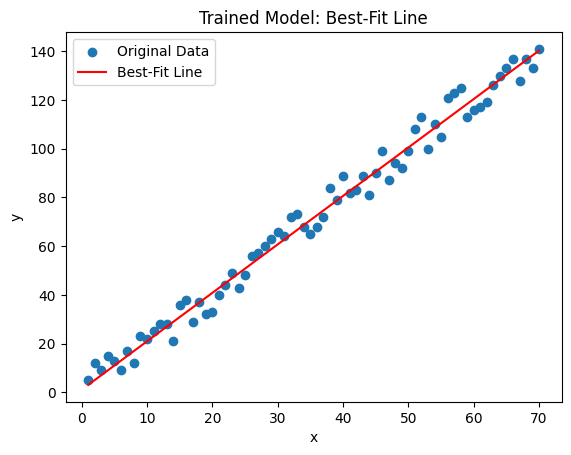

In [64]:
plt.scatter(X.numpy(), y.numpy(), label="Original Data")
plt.plot(x1.numpy(), y1.numpy(), 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()